In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
iris = sns.load_dataset('iris')


In [14]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

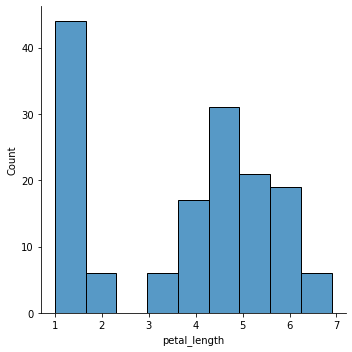

In [21]:
sns.displot(iris, x="petal_length")

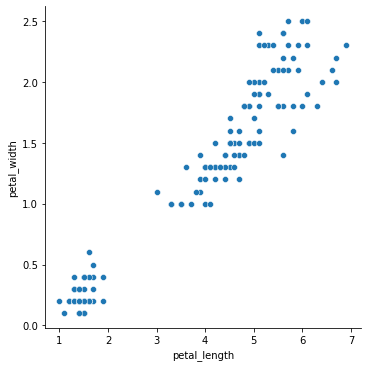

In [23]:
# Is there a correlation between petal length and petal width
sns.relplot(x='petal_length', y='petal_width', data=iris)

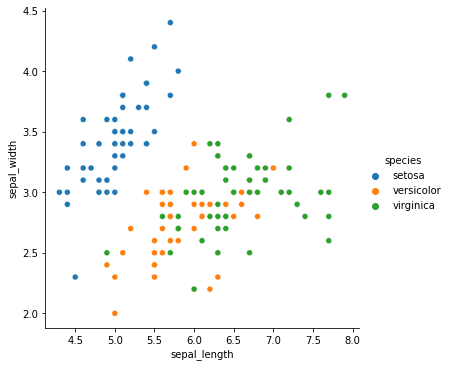

In [24]:
# Would it be reasonable to predict species based on sepal width and sepal length? yes, species seem to be reliably grouped 

sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

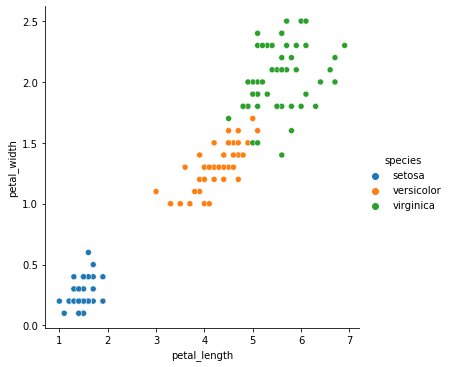

In [25]:
# Which features would be best used to predict species?
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)

In [39]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

anscombe = sns.load_dataset('anscombe')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [36]:
sum_stats = anscombe.groupby('dataset').agg(['max', 'min', 'mean'])
sum_stats

x                y                
          max  min mean    max   min      mean
dataset                                       
I        14.0  4.0  9.0  10.84  4.26  7.500909
II       14.0  4.0  9.0   9.26  3.10  7.500909
III      14.0  4.0  9.0  12.74  5.39  7.500000
IV       19.0  8.0  9.0  12.50  5.25  7.500909

In [52]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

insect_sprays = data("InsectSprays")
insect_sprays = data("InsectSprays",show_doc=True)

insect_sprays.columns
sns.boxplot(data=insect_sprays,y="count",x="spray")

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

AttributeError: 'NoneType' object has no attribute 'columns'

In [50]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

insectspray = data.load_dataset('InsectSprays')

ValueError: 'InsectSprays' is not one of the example datasets.

In [53]:
def get_db_url(u,p,h,d):
    url = f'mysql+pymysql://{u}:{p}@{h}/{d}'
    return url

from env import host, user, password

host = host
user = user
password = password

chipotle_url = get_db_url(user,password,host,"chipotle")
chipotle_url
chipotle = pd.read_sql('SELECT * FROM orders', chipotle_url)

chipotle.columns

chipotle.item_price = chipotle.item_price.str.replace("$","").astype(float)

most_orders = chipotle.groupby("item_name").agg({"id":"count","item_price":"sum"})
most_orders
type(most_orders)
most_orders.sort_values(by="id",ascending=False)

top_four_items = most_orders.sort_values(by="id",ascending=False).head(4)
top_four_items
sns.barplot(x="id",y="item_price",data=top_four_items)

ImportError: cannot import name 'user' from 'env' (/Users/albertopuentes/Desktop/codeup-data-science/numpy-pandas-visualization-exercises/env.py)